In [ ]:
# Run as the FIRST cell AFTER A FACTORY RESET.

import os
import sys

# Clear /etc/environment
!sudo truncate -s 0 /etc/environment

# Set CUDA environment variables
os.environ['CUDA_HOME'] = '/usr/local/cuda'
os.environ['LD_LIBRARY_PATH'] = f"{os.environ['CUDA_HOME']}/lib64:/lib/x86_64-linux-gnu:{os.environ.get('LD_LIBRARY_PATH', '')}"
os.environ['PATH'] = f"{os.environ['CUDA_HOME']}/bin:{os.environ.get('PATH', '')}"

# Persist environment variables
with open('/etc/environment', 'w') as f:
    f.write('CUDA_HOME=/usr/local/cuda\n')
    f.write('LD_LIBRARY_PATH=/usr/local/cuda/lib64:/lib/x86_64-linux-gnu:$LD_LIBRARY_PATH\n')
    f.write('PATH=/usr/local/cuda/bin:$PATH\n')

print("\n--- Starting Installation with tf-nightly 2.20.0.dev20250514 ---")

# Clear pip cache
!pip cache purge

# Uninstall conflicting packages
!pip uninstall -y tensorflow tf-nightlmmmy numpy scipy appfl protobuf ml-dtypes tensorflow-datasets matplotlib tensorflow-privacy tensorflow-compression tensorflow-text tensorflow_decision_forests nvidia-cuda-runtime-cu11 nvidia-cudnn-cu11 nvidia-cuda-runtime-cu12 nvidia-cudnn-cu12 torch torchao torchaudio torchdata torchsummary torchtune torchvision

# Remove residual cuDNN libraries
!sudo rm -f /lib/x86_64-linux-gnu/libcudnn*.so*
!sudo ldconfig

# Install CUDA and cuDNN
!pip install --no-cache-dir nvidia-cuda-runtime-cu12==12.4.127 nvidia-cudnn-cu12==9.1.0.70

# Install tf-nightly
!pip install --no-cache-dir --no-deps --force-reinstall tf-nightly==2.20.0.dev20250514

# Install dependencies for appfl and federated learning
!pip install --no-cache-dir numpy==1.26.4 scipy==1.15.3 ml-dtypes>=0.3.1 protobuf==4.25.3 appfl==1.5.0 tensorflow-datasets==4.9.2 matplotlib==3.7.2 tensorflow-privacy==0.8.12 tensorflow-compression==2.14.1 tensorflow-text==2.20.0 tensorflow_decision_forests==1.12.0 --no-deps

# Install torch and related packages
!pip install --no-cache-dir torch==2.6.0+cu124 torchao==0.10.0 torchaudio==2.6.0+cu124 torchdata==0.11.0 torchsummary==1.5.1 torchtune==0.6.1 torchvision==0.21.0+cu124 --index-url https://download.pytorch.org/whl/cu124

print("\n--- Installation Complete ---")
print("MANUAL RUNTIME RESTART REQUIRED: Click 'Runtime > Restart runtime' now, then run the verification cell.")


--- Starting Installation with tf-nightly 2.20.0.dev20250514 ---
Files removed: 0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: tensorflow-datasets 4.9.9
Uninstalling tensorflow-datasets-4.9.9:
  Successfully uninstalled tensorflow-datasets-4.9.9
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tenso

In [ ]:
# Enable verbose TensorFlow logging
!export TF_CPP_MIN_LOG_LEVEL=0

print("\n--- Step 3: Try tf-nightly 2.20.0.dev20250514 ---")

# Check TensorFlow version and cuDNN status
!python -c "import tensorflow as tf; print('TensorFlow version:', tf.__version__); print('GPU Devices:', tf.config.list_physical_devices('GPU')); print('CUDA Built:', tf.test.is_built_with_cuda()); print('cuDNN Built:', hasattr(tf.test, 'is_built_with_cudnn') and tf.test.is_built_with_cudnn()); print('CUDA Version:', tf.sysconfig.get_build_info().get('cuda_version', 'Not found')); print('cuDNN Version:', tf.sysconfig.get_build_info().get('cudnn_version', 'Not found'))" || echo "TensorFlow import failed"

# Check TensorFlow shared libraries
print("\n--- TensorFlow Shared Libraries ---")
!find /usr/local/lib/python3.11/dist-packages/tensorflow -name "*.so" 2>/dev/null || echo "No shared libraries found"

# Check TensorFlow library dependencies
print("\n--- TensorFlow Library Dependencies ---")
!find /usr/local/lib/python3.11/dist-packages/tensorflow -name "*.so" -exec ldd {} \; | grep cudnn 2>/dev/null || echo "No cuDNN dependency found"

# Check cuDNN libraries
print("\n--- cuDNN Library Check ---")
!ls -l /lib/x86_64-linux-gnu | grep cudnn 2>/dev/null || echo "cuDNN not found"
!ldconfig -p | grep -E 'libcudnn'

# Check environment variables
print("\n--- Environment Variables ---")
!echo $CUDA_HOME
!echo $LD_LIBRARY_PATH
!echo $PATH
!cat /etc/environment

# Check installed packages
print("\n--- Installed Packages ---")
!pip list | grep -E 'nvidia|tensorflow|tf-nightly|numpy|scipy|appfl|protobuf|ml-dtypes|torch'

# Test SciPy import
print("\n--- SciPy Test ---")
!python -c "import scipy; print('SciPy version:', scipy.__version__)" || echo "SciPy import failed"

!nvidia-smi

print("\n--- Step 3 Complete ---")
print("Check 'cuDNN Built', 'TensorFlow Library Dependencies', and 'cuDNN Library Check'.")


--- Step 3: Try tf-nightly 2.20.0.dev20250514 ---
2025-06-11 14:12:51.367149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749651171.392212    1152 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749651171.401124    1152 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-11 14:12:51.426551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
TensorFlow version: 2.18.0
GPU Devices: [PhysicalDevice(name='/physical_de

In [ ]:
# Colab cell: check GPU
!nvidia-smi


Wed Jun 11 14:13:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Colab cell: enable mixed precision
import tensorflow as tf
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

print("Mixed precision policy:", mixed_precision.global_policy())


Mixed precision policy: <DTypePolicy "mixed_float16">


Starting federated learning on GPU (Tesla T4)...
Starting federated learning on GPU...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.PV5K8G_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.PV5K8G_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.

Round 1/100
Training client 3... Val Acc: 0.123
Training client 5... Val Acc: 0.142
Training client 9... Val Acc: 0.097
Training client 0... Val Acc: 0.120
Training client 2... Val Acc: 0.108
Training client 6... Val Acc: 0.108
Training client 4... Val Acc: 0.162
Training client 7... Val Acc: 0.095
Round 1 Test Accuracy: 0.1072
New best: 0.1072

Round 2/100
Training client 3... Val Acc: 0.185
Training client 0... Val Acc: 0.215
Training client 2... Val Acc: 0.213
Training client 8... Val Acc: 0.220
Training client 6... Val Acc: 0.177
Training client 9... Val Acc: 0.235
Training client 4... Val Acc: 0.233
Training client 1... Val Acc: 0.165
Round 2 Test Accuracy: 0.1854
New best: 0.1854

Round 3/100
Training client 8... Val Acc: 0.268
Training client 3... Val Acc: 0.188
Training client 2... Val Acc: 0.355
Training client 9... Val Acc: 0.233
Training client 5... Val

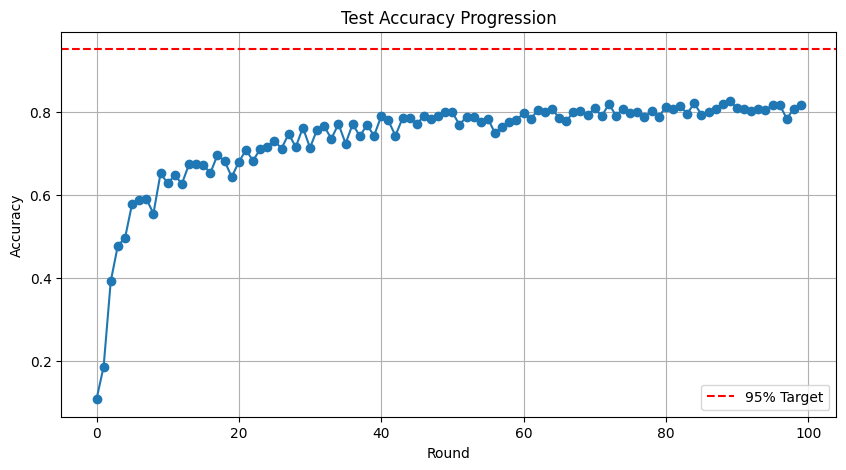


Final Result: 0.8254


In [ ]:
import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gc

class Config:
    def __init__(self):
        pass

cfg = Config()
cfg.num_rounds = 100
cfg.clients_per_round = 8
cfg.learning_rate = 0.001
cfg.batch_size = 32
cfg.client_epochs = 4
cfg.num_clients = 10
cfg.examples_per_client = 2000
cfg.test_samples = 5000
cfg.optimizer = 'adam'
cfg.model_name = 'high_acc_cnn'
cfg.dataset = 'cifar10'

def advanced_preprocess(image, label, training=True):
    image = tf.cast(image, tf.float32) / 255.0
    if training:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, 0.1)
        image = tf.image.random_contrast(image, 0.9, 1.1)
    return image, label

def get_data():
    test_ds = tfds.load('cifar10', split=f'test[:{cfg.test_samples}]', as_supervised=True)
    test_ds = test_ds.map(lambda x, y: advanced_preprocess(x, y, False),
                          num_parallel_calls=tf.data.AUTOTUNE)
    test_ds = test_ds.batch(cfg.batch_size).cache().prefetch(tf.data.AUTOTUNE)

    client_datasets = {}
    client_val_datasets = {}

    for i in range(cfg.num_clients):
        client_split = f'train[{i*cfg.examples_per_client}:{(i+1)*cfg.examples_per_client}]'
        client_data = tfds.load('cifar10', split=client_split, as_supervised=True)

        total_examples = cfg.examples_per_client
        train_size = int(0.8 * total_examples)
        train_data = client_data.take(train_size)
        val_data = client_data.skip(train_size)

        train_data = train_data.map(lambda x, y: advanced_preprocess(x, y, True),
                                    num_parallel_calls=tf.data.AUTOTUNE)
        train_data = train_data.cache().shuffle(10000).batch(cfg.batch_size).prefetch(tf.data.AUTOTUNE)

        val_data = val_data.map(lambda x, y: advanced_preprocess(x, y, False),
                                num_parallel_calls=tf.data.AUTOTUNE)
        val_data = val_data.cache().batch(cfg.batch_size).prefetch(tf.data.AUTOTUNE)

        client_datasets[i] = train_data
        client_val_datasets[i] = val_data

    return client_datasets, client_val_datasets, test_ds

def create_high_acc_model():
    def conv_block(x, filters, kernel_size=3, strides=1):
        x = tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        return x

    def residual_block(x, filters):
        shortcut = x
        x = conv_block(x, filters)
        x = conv_block(x, filters)
        if shortcut.shape[-1] != filters:
            shortcut = conv_block(shortcut, filters, kernel_size=1)
        x = tf.keras.layers.Add()([shortcut, x])
        return tf.keras.layers.Activation('relu')(x)

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = conv_block(inputs, 64, strides=1)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax', dtype='float32')(x)  # ensure output is float32

    model = tf.keras.Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=cfg.learning_rate,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7,
        amsgrad=True
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def cosine_decay_with_warmup(epoch):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return cfg.learning_rate * ((epoch + 1) / warmup_epochs)
    decay_epochs = cfg.num_rounds - warmup_epochs
    epoch = epoch - warmup_epochs
    cosine_decay = 0.5 * (1 + np.cos(np.pi * epoch / decay_epochs))
    alpha = 0.1
    return cfg.learning_rate * (alpha + (1 - alpha) * cosine_decay)

def federated_learning():
    print("Starting federated learning on GPU...")
    client_data, client_val_data, test_data = get_data()
    global_model = create_high_acc_model()
    test_accuracies = []

    best_accuracy = 0.0
    best_weights = None
    patience = 20
    no_improvement_rounds = 0

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(cosine_decay_with_warmup)

    client_model = create_high_acc_model()

    for round_num in range(cfg.num_rounds):
        print(f"\nRound {round_num+1}/{cfg.num_rounds}")

        if round_num > 0:
            client_scores = []
            for client_id in range(cfg.num_clients):
                val_loss, val_acc = global_model.evaluate(client_val_data[client_id], verbose=0)
                client_scores.append((client_id, val_acc))

            client_scores.sort(key=lambda x: x[1], reverse=True)
            selected = [x[0] for x in client_scores[:cfg.clients_per_round//2]]
            remaining = [x[0] for x in client_scores[cfg.clients_per_round//2:]]
            selected.extend(random.sample(remaining, cfg.clients_per_round//2))
        else:
            selected = random.sample(range(cfg.num_clients), cfg.clients_per_round)

        client_weights = []

        for client_id in selected:
            print(f"Training client {client_id}...", end=" ")
            client_model.set_weights(global_model.get_weights())

            client_model.fit(
                client_data[client_id],
                epochs=cfg.client_epochs,
                verbose=0,
                callbacks=[lr_scheduler]
            )

            val_loss, val_acc = client_model.evaluate(client_val_data[client_id], verbose=0)
            print(f"Val Acc: {val_acc:.3f}")
            client_weights.append(client_model.get_weights())

        if client_weights:
            avg_weights = []
            for weights_list_tuple in zip(*client_weights):
                avg_weights.append(np.mean(weights_list_tuple, axis=0))

            global_model.set_weights(avg_weights)
            loss, acc = global_model.evaluate(test_data, verbose=0)
            test_accuracies.append(acc)

            print(f"Round {round_num+1} Test Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_weights = global_model.get_weights()
                no_improvement_rounds = 0
                print(f"New best: {best_accuracy:.4f}")
            else:
                no_improvement_rounds += 1

            if no_improvement_rounds >= patience:
                print(f"Early stopping: No improvement for {patience} rounds")
                break

            if acc >= 0.95:
                print(f"🎯 Target accuracy of 95% reached! Final: {acc:.4f}")
                break

    if best_weights is not None:
        global_model.set_weights(best_weights)
        final_loss, final_acc = global_model.evaluate(test_data, verbose=0)
        print(f"Best model restored with accuracy: {final_acc:.4f}")
        # Save the best model in the SavedModel format
        global_model.export('best_federated_model') # Changed from save to export
        print("✅ Model saved as 'best_federated_model'")
    else:
        final_loss, final_acc = global_model.evaluate(test_data, verbose=0)
        # If no best weights, save the final model
        global_model.export('best_federated_model') # Changed from save to export
        print("✅ Model saved as 'best_federated_model'")


    plt.figure(figsize=(10, 5))
    plt.plot(test_accuracies, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Target')
    plt.title('Test Accuracy Progression')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return global_model, final_acc

if __name__ == "__main__":
    print("Starting federated learning on GPU (Tesla T4)...")
    model, final_acc = federated_learning()
    print(f"\nFinal Result: {final_acc:.4f}")



In [ ]:
!zip -r best_federated_model.zip best_federated_model

updating: best_federated_model/ (stored 0%)
updating: best_federated_model/fingerprint.pb (stored 0%)
updating: best_federated_model/assets/ (stored 0%)
updating: best_federated_model/variables/ (stored 0%)
updating: best_federated_model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: best_federated_model/variables/variables.index (deflated 77%)
updating: best_federated_model/saved_model.pb (deflated 90%)


In [ ]:
from google.colab import files
files.download('best_federated_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>